## AIN432 PA1

In [1]:
import os

In [2]:
# data directory
data_dir = input("path of data").replace("\\","/")

path of dataC:\Users\GorkemKola\Downloads\data


In [3]:
# path of images
path_list = os.listdir(data_dir)

In [4]:
path_list

['00056v.jpg',
 '00088v.jpg',
 '00106v.jpg',
 '00125v.jpg',
 '00137v.jpg',
 '00149v.jpg',
 '00153v.jpg',
 '00163v.jpg',
 '00194v.jpg',
 '00398v.jpg',
 '00458v.jpg',
 '00600v.jpg',
 '00757v.jpg',
 '00804v.jpg',
 '00888v.jpg',
 '00889v.jpg',
 '00907v.jpg',
 '00911v.jpg',
 '01031v.jpg',
 '01164v.jpg',
 '01167v.jpg',
 '01269v.jpg',
 '01522v.jpg',
 '01597v.jpg',
 '01598v.jpg',
 '01728v.jpg',
 '01880v.jpg',
 '10131v.jpg',
 '31421v.jpg']

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [6]:
img_list = []

In [7]:
# reading images as grayscale
for path in path_list:
    img_path = os.path.join(data_dir, path)
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    img_list.append(img)

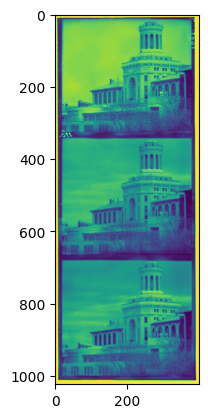

In [8]:
plt.imshow(img_list[-1])

In [9]:
# a canny image list to remove borders of images
canny_list = [cv.Canny(img,100,200) for img in img_list]

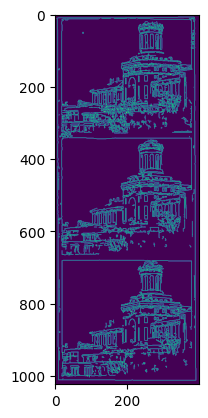

In [10]:
plt.imshow(canny_list[-1])

In [11]:
# remove borders function
def remove_borders(img, canny_img):
    for di in range(canny_img.shape[0]):
        if(np.sum(canny_img[di,:]>0)):
            break
            
    for dj in range(canny_img.shape[0]-1, 0, -1):
        if(np.sum(canny_img[dj,:]>0)):
            break
            
    for dk in range(canny_img.shape[1]):
        if(np.sum(canny_img[:,dk]>0)):
            break
            
    for dl in range(canny_img.shape[1]-1, 0, -1):
        if(np.sum(canny_img[:,dl]>0)):
            break
        
    tolerance = 10 
    return img[di+tolerance:dj-tolerance, dk+tolerance:dl-tolerance]

In [12]:
cropped_imgs = []

# removing borders
for i in range(len(img_list)):
    cropped_imgs.append(remove_borders(img_list[i], canny_list[i]))

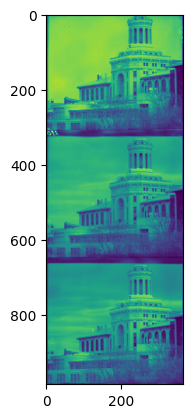

In [13]:
plt.imshow(cropped_imgs[-1])

In [14]:
for img in cropped_imgs:
    print(img.shape)

(987, 364)
(984, 359)
(987, 363)
(985, 361)
(983, 366)
(986, 360)
(993, 365)
(996, 361)
(988, 361)
(991, 365)
(985, 362)
(983, 360)
(992, 365)
(986, 361)
(984, 358)
(994, 370)
(994, 358)
(989, 370)
(995, 369)
(983, 363)
(993, 368)
(981, 358)
(986, 358)
(979, 357)
(990, 361)
(978, 361)
(980, 359)
(987, 362)
(985, 364)


In [15]:
# rgb function
def make_rgb(imgs):
    rgb_imgs = []
    for img in imgs:
        
        # height and width
        height = img.shape[0]//3
        width = img.shape[1]
        
        # dividing image 3 parts
        blue = img[0: height,:]
        green = img[height: 2*height,:]
        red = img[2*height:3*height,:]
        
        # making canny images to remove borders 
        blue_canny = cv.Canny(blue,100,200)
        green_canny = cv.Canny(green,100,200)
        red_canny = cv.Canny(red,100,200)

        # removing borders
        blue = remove_borders(blue, blue_canny)
        green = remove_borders(green, green_canny)
        red = remove_borders(red, red_canny)
        
        # height and width
        height = blue.shape[0]
        width = blue.shape[1]
        
        # making their size equal
        green = cv.resize(green, (width, height))
        red = cv.resize(red, (width, height))
        rgb_imgs.append((blue, green, red))
    return rgb_imgs

In [16]:
rgb_imgs = make_rgb(cropped_imgs)

In [17]:
# NCC function
def cor(X, Y):
    return np.sum(X * Y) / np.sum(X) / np.sum(Y)

In [18]:
# Align function
def align(im1, im2):
    best_score = -float('inf')
    best_shift = [0, 0]
    
    for x in [-15,16]:
        for y in [-15,16]:
            score = cor(np.roll(im1, (x, y), (0, 1)), im2)
            if score > best_score:
                best_score = score
                best_shift = [x,y]
    return np.roll(im1, best_shift, (0, 1)), np.array(best_shift)

In [19]:
final_imgs = []
for (blue , green, red) in rgb_imgs:
    # aligning the second and the third parts (green and red channels) to the first one (blue channel)
    ag, g_shift = align(green, blue)
    ar, r_shift = align(red, blue)
    
    final_imgs.append(np.dstack([ar, ag, blue]))

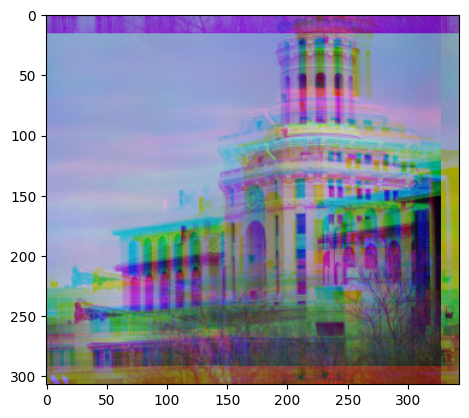

In [20]:
plt.imshow(final_imgs[-1])

In [21]:
# gamma function
def adjust_gamma(image, gamma=1):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

In [22]:
for i in range(len(final_imgs)):
    # i looked several gamma values and thought 1.3 is the best.
    adjusted = adjust_gamma(final_imgs[i], gamma=1.3)
    final_imgs[i] = adjusted

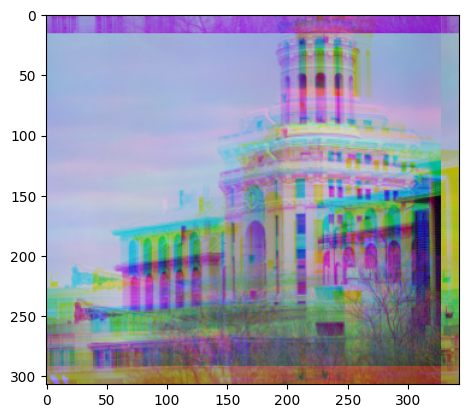

In [23]:
plt.imshow(final_imgs[-1])

In [24]:
# histogram equalization
for i in range(len(final_imgs)):
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    final_imgs[i] = adjusted

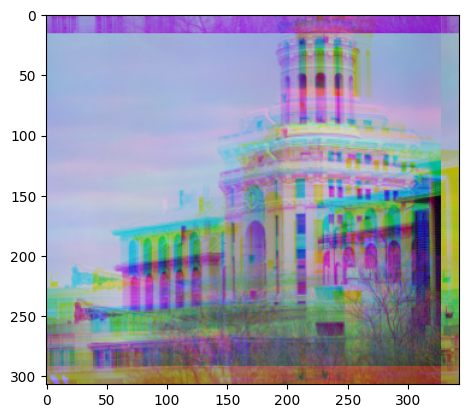

In [25]:
plt.imshow(final_imgs[-1])

In [26]:
for i,img in enumerate(final_imgs):
    cv.imwrite(f'./output/image{i}.png',img)